In [1]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import numpy as np

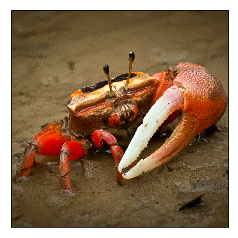

In [2]:
img = cv2.imread('input/crab.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

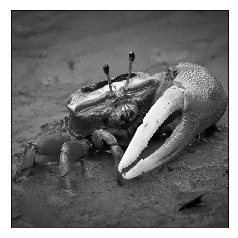

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.xticks([])
plt.yticks([])
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

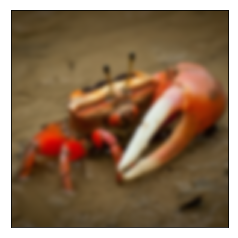

In [4]:
img_blur = cv2.GaussianBlur(img_rgb,(101,101),0)
plt.xticks([])
plt.yticks([])
plt.imshow(img_blur)

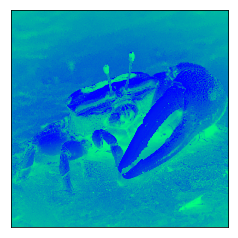

In [5]:
img_red = img_rgb[:,:,0]
img_red_blur = cv2.GaussianBlur(img_red,(101,101),0)
plt.xticks([])
plt.yticks([])
plt.imshow(img_red, cmap="winter_r")

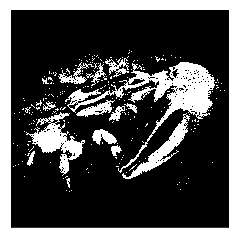

In [6]:
lower_red = np.array([150,0,0])
upper_red = np.array([255,200,200])
mask0 = cv2.inRange(img_rgb, lower_red, upper_red)

plt.xticks([])
plt.yticks([])
plt.imshow(mask0, cmap='binary_r')

Colormap blue is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

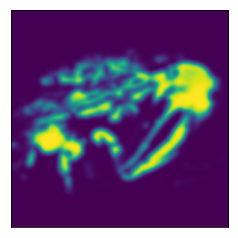

In [7]:
img_r_blur = cv2.GaussianBlur(mask0,(101,101),0)
plt.xticks([])
plt.yticks([])
plt.imshow(img_r_blur)

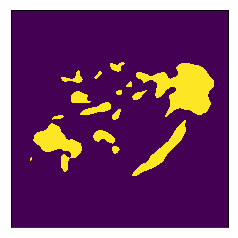

In [8]:
threshold = 150

ret, img_thresh = cv2.threshold(img_r_blur, threshold, 255, cv2.THRESH_BINARY)
contours, hierarchy, _ = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plt.xticks([])
plt.yticks([])
plt.imshow(img_thresh)

[]

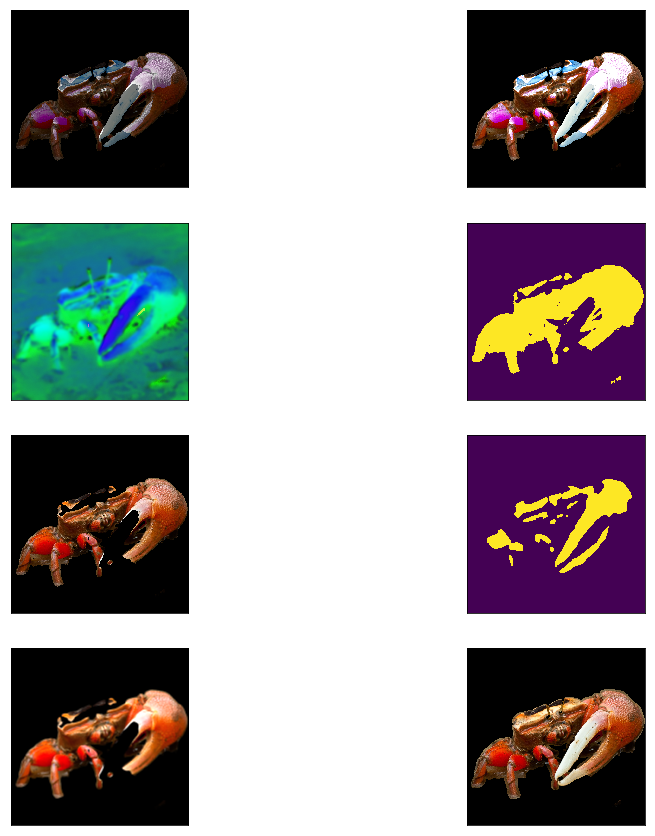

In [9]:
img_blur_bgr = cv2.GaussianBlur(img,(61,61),0)
hsv = cv2.cvtColor(img_blur_bgr,cv2.COLOR_BGR2HSV)

# lower red
lower_red = np.array([0,0,0])
upper_red = np.array([15,255,255])

# #upper red
# lower_red2 = np.array([170,0,0])
# upper_red2 = np.array([180,255,255])

#white
lower_red2 = np.array([0,0,180])
upper_red2 = np.array([180,255,255])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img_rgb,img_rgb, mask= mask)

# mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
# res2 = cv2.bitwise_and(img,img, mask= mask2)

mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
res2 = cv2.bitwise_and(img,img, mask= mask2)

img3 = res+res2
img4 = cv2.add(res,res2)
img5 = cv2.addWeighted(res,0.5,res2,0.5,0)

kernel = np.ones((17,17),np.float32)/225
smoothed = cv2.filter2D(res,-1,kernel)
smoothed2 = cv2.filter2D(img3,-1,kernel)

smoothed2 = cv2.cvtColor(smoothed2,cv2.COLOR_BGR2GRAY)
(thresh, smoothed2) = cv2.threshold(smoothed2, 1, 255, cv2.THRESH_BINARY)
final = cv2.bitwise_and(img_rgb, img_rgb, mask= smoothed2)
# plt.xticks([])
# plt.yticks([])
# plt.imshow(res)
# plt.imshow(smoothed2)


fig, axes = plt.subplots(4, 2, figsize=(15, 15))
# fig.suptitle('Sharing x per column, y per row')

axes[0,0].imshow(img5)
axes[0,1].imshow(img4)
axes[1,0].imshow(hsv)
axes[1,1].imshow(mask)
axes[2,0].imshow(res)
axes[2,1].imshow(mask2)
axes[3,0].imshow(smoothed)
# axes[3,1].imshow(smoothed2, cmap="gray")
axes[3,1].imshow(final)
# axes[2,2].imshow(smoothed2)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

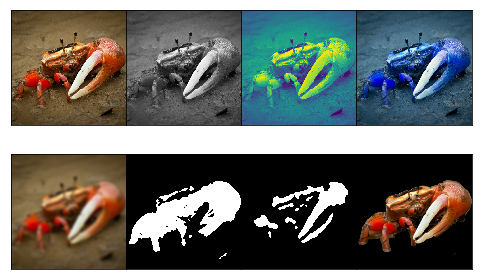

In [10]:
final2 = cv2.GaussianBlur(final,(11,11),0)

nrow=2
ncol=4

fig, axes = plt.subplots(nrow, ncol, figsize=(8,6))

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

axes[0,0] = plt.subplot(gs[0,0])
axes[0,0].imshow(img_rgb)
# axes[0,0].set_aspect('equal')

axes[0,1] = plt.subplot(gs[0,1])
axes[0,1].imshow(gray, cmap='gray', vmin=0, vmax=255)
# axes[0,1].set_aspect('equal')

axes[0,2] = plt.subplot(gs[0,2])
axes[0,2].imshow(img_red)
# axes[0,2].set_aspect('equal')

axes[0,3] = plt.subplot(gs[0,3])
axes[0,3].imshow(img)
# axes[0,3].set_aspect('equal')

axes[1,0] = plt.subplot(gs[1,0])
axes[1,0].imshow(img_blur)
# axes[1,0].set_aspect('equal')

axes[1,1] = plt.subplot(gs[1,1])
axes[1,1].imshow(mask, cmap='binary_r')
# axes[1,1].set_aspect('equal')

axes[1,2] = plt.subplot(gs[1,2])
axes[1,2].imshow(mask2, cmap='binary_r')
# axes[1,2].set_aspect('equal')

axes[1,3] = plt.subplot(gs[1,3])
axes[1,3].imshow(final2)
# axes[1,3].set_aspect('equal')

# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=0)
# fig.subplots_adjust(wspace=0, hspace=0)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

plt.savefig('output/cv_example.png', dpi=300, bbox_inches='tight')